In [2]:
# Beat tracking example
from __future__ import print_function
import librosa
import librosa.display

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt


In [4]:
import IPython.display as ipd

In [5]:
import sklearn

In [59]:
filename = '../data/raw/train_curated/0006ae4e.wav'

In [60]:
# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(filename)

In [61]:
ipd.Audio(filename) # load a local WAV file

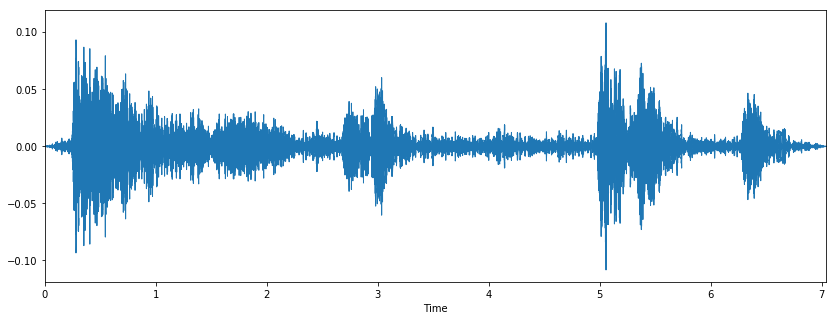

In [62]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)

In [44]:
sr*0.010

220.5

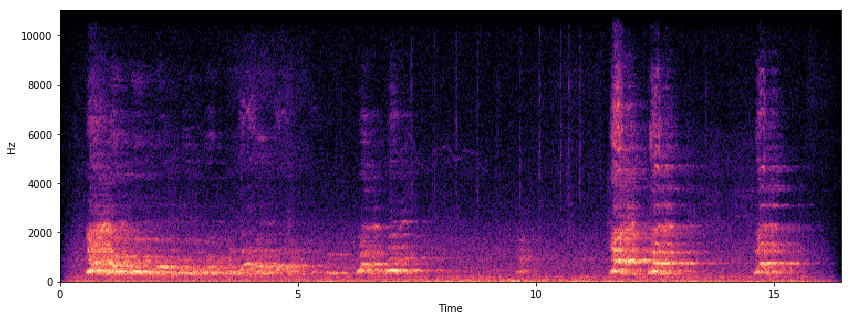

In [63]:
Y = librosa.stft(y,  n_fft=512, win_length=512,hop_length=220)
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='hz')

In [46]:
# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

In [47]:
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 64.60 beats per minute


In [48]:
# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

In [49]:
beat_times

array([0.13931973])

#### MFCC

In [50]:
# Set the hop length; at 22050 Hz, 512 samples ~= 23ms
# also N of FFT is defined with this value
hop_length = 512

In [51]:
# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, dct_type=2, n_mfcc=40)

In [52]:
mfcc

array([[-4.92958861e+02, -4.87099827e+02, -4.51793378e+02, ...,
        -4.37911872e+02, -4.29688765e+02, -4.28325878e+02],
       [ 6.06349121e+01,  6.26163811e+01,  7.94649403e+01, ...,
         8.29069442e+01,  8.36164770e+01,  7.92418652e+01],
       [-1.75677555e+01, -1.44865422e+01, -2.50339871e+01, ...,
        -2.58869757e+01, -2.65161984e+01, -2.77790714e+01],
       ...,
       [-3.64866107e+00, -1.57271708e+00,  1.44400130e+00, ...,
        -3.46481851e+00, -1.42681887e+00,  1.87574862e+00],
       [-6.85508231e+00, -4.95736546e+00, -7.64500212e+00, ...,
        -9.54601398e+00, -3.70476178e+00,  1.46977906e+00],
       [-1.96444329e+00,  6.06931648e-02, -4.12786923e+00, ...,
         5.03236232e-01,  1.35126919e+00,  5.40951117e+00]])

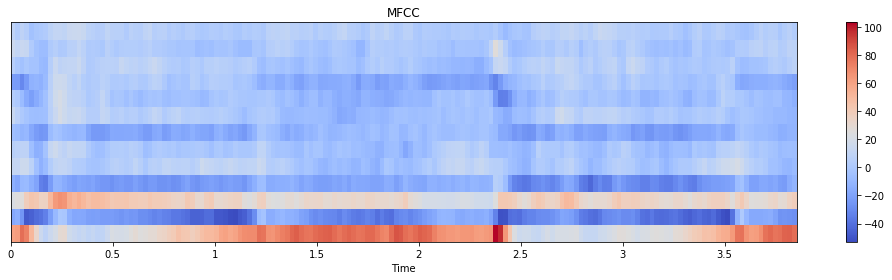

In [53]:
plt.figure(figsize=(14, 4))
librosa.display.specshow(mfcc[1:14], x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [54]:
mfccs = sklearn.preprocessing.scale(mfcc, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[-3.62494506e-16 -6.78172378e-16 -2.77388554e-16 -7.82506590e-16
 -7.97220389e-16  3.61156888e-17  7.82506590e-17 -7.00911885e-16
  8.15947042e-17 -5.88551965e-17  2.24719841e-16  5.14982969e-17
  5.35047241e-17  8.39355359e-17 -1.01658976e-16  1.60514172e-16
  4.01285431e-17 -1.24398483e-16  2.72874093e-16 -3.87909250e-17
  1.33761810e-16  5.12976542e-16 -6.83230246e-17  1.60514172e-16
 -1.02327785e-16 -2.34417572e-16 -2.46121731e-16 -4.45426828e-16
  6.68809051e-18  4.85555371e-16  4.94918698e-17  3.47780707e-17
  1.07009448e-16  2.56822676e-16  3.97272576e-16  6.23330036e-16
 -9.65593067e-17 -3.21028344e-17  8.22635133e-17 -2.00642715e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


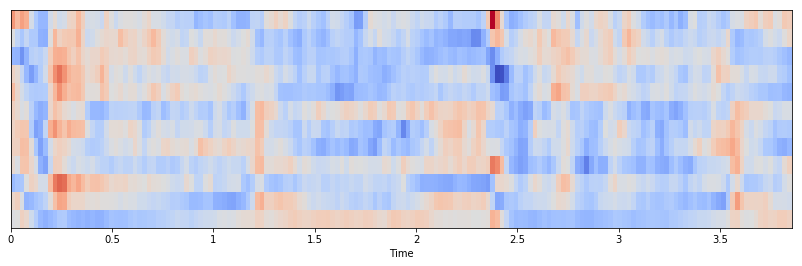

In [55]:
plt.figure(figsize=(14, 4))
librosa.display.specshow(mfccs[1:13], sr=sr, x_axis='time')
pass

In [ ]:
(nframes, ncoeff) = mfccS.shape
n = numpy.arange(ncoeff)
lift = 1 + (cep_lifter / 2) * np.sin(np.pi * n / cep_lifter)
mfcc *= lift  #*